## Modifier la partie à modifier du programme ci-dessous en notant les formules permettant de calculer les coordonnées du vecteur vitesse et celle du vecteur accélération

[7.0, 6.998881099, 6.982104744, 6.90956205, 6.715502101, 6.312235615, 5.599248567, 4.480957653, 2.89565726, 0.855470396, -1.508498917, -3.91012293, -5.905091302, -6.949767109, -6.574937759, -4.753602016, -1.884093372, 1.400859311, 4.376921437, 6.38786902]
[0.0, 0.125153331, 0.500213304, 1.121584717, 1.975356052, 3.025835677, 4.201001724, 5.37782656, 6.373003141, 6.947529806, 6.835527121, 5.806112182, 3.758975487, 0.83710043, -2.402122699, -5.138411026, -6.741675768, -6.858395818, -5.462834313, -2.86271364]
[  0.          -0.04473814  -0.22329762  -0.66650661  -1.49331609
  -2.79063384  -4.5781949   -6.75897827  -9.06371814 -11.01039044
 -11.91398331 -10.99148096  -7.59911045  -1.67461614   5.49041273
  11.72711097  15.38615332  15.65253702  12.46752427   0.        ]
[  0.           1.25053326   2.49107846   3.68785687   4.7606274
   5.56411418   5.87997721   5.43000354   3.92425812   1.15630995
  -2.85354406  -7.69137909 -12.42252938 -15.40274547 -14.93877864
 -10.84888267  -4.29996198

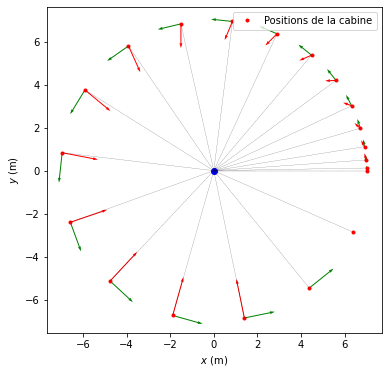

In [24]:
#importation des modules
import numpy as np
import matplotlib.pylab as plt
import csv
import sys

#initialisation du pointage
table = []
#initialisation du temps en seconde
temps = []
#initialisation des abscisses
x = []
#initialisation des ordonnées
y = []

with open('pointage_centrifugeuse.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';', quotechar='|')
    for row in spamreader:
        table.append(row)

#taille du tableau importé
N = len(table)
M = len(table[0])

#initialisation des constantes du problème
R = 7.00        #Rayon de la centrifugeuse en m
k = 6.26        #constante k en m.s-2
v0 = 16.6       #constante v0 en m.s-1
Dt = 0.200      #pas de temps en s

#Initialisation des vitesses
vx =np.zeros(N-1)       #vitesse calculée selon l'axe des abscisses
vy =np.zeros(N-1)       #vitesse calculée selon l'axe des ordonnées


#Initialisation des accélérations
ax =np.zeros(N-1)       #accélération calculée selon l'axe des abscisses
ay =np.zeros(N-1)       #accélération calculée selon l'axe des ordonnées


#Vérification de la structure de ce tableau (3 colonnes ont été exportées : temps, X et Y)
if M != 3 :
    print("Problème dans la réalisation de votre pointage. Reprenez le travail et exportez uniquement deux courbes (Mouvement_X et Mouvement_Y)")
    sys.exit()

#importation des coordonnées X, Y et temps
for i in range(1,N):
    #Génération des listes, avec transformation des données
    temps.append(float(table[i][0].replace(',','.')))
    x.append(float(table[i][1].replace(',','.')))
    y.append(float(table[i][2].replace(',','.')))

#Création d'une fonction permettant de tracer les vecteurs
def trace_vect(x,y,Vectx,Vecty,titre,couleur,position):
    q = plt.quiver(x,y,Vectx,Vecty,color = couleur,width=0.003)
    plt.quiverkey(q, X=0.5, Y=position, U=10,label=titre, labelpos='E', color=couleur)

###########################################################
###         DEBUT DE LA PARTIE A MODIFIER               ###
###########################################################

#Calculs approchés des coordonnées des vitesses
for i in range(1,N-2):
    vx[i] = 0
    vy[i] = 0

#Calculs approchés des coordonnées des accélérations
for i in range(2,N-3):
    ax[i] = 0
    ay[i] = 0

###########################################################
###         FIN DE LA PARTIE A MODIFIER                 ###
###########################################################


#imposer la taille de la zone de travail
plt.figure(1, figsize=(6, 6))
print(x)
print(y)
print(vx)
print(vy)
print(ax)
print(ay)
if ay[N-4]!= 0 :
    #tracer les vecteurs vitesses calculées
    trace_vect(x,y,vx,vy,"Vecteur vitesse calculée",'g',1.09)

    #tracer les vecteurs accélérations calculées
    trace_vect(x,y,ax,ay,"Vecteur accélération calculée",'r',1.06)


#tracer les positions
plt.plot(x,y,"r.",label="Positions de la cabine")

#tracer le centre de rotation
plt.plot(0,0,"bo")

#tracer les rayons
for i in range(0,N-1):
    plt.plot([0, x[i]], [0, y[i]], 'k--', lw=0.2)

#position du bloc légende
plt.legend(loc='upper right')

#étiquettes des axes
plt.xlabel(r'$ x $'+' (m)')
plt.ylabel(r'$ y $'+' (m)')

#Titre du graphique
# plt.title('Positions et accélération de la cabine',loc='left')
plt.show()
